# Programming for Data Science and Artificial Intelligence

## Unsupervised Learning - Clustering - GMM

### Readings:
- [VANDER] Ch5
- [HASTIE] Ch14.3
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Mixture Models

K-means has the following limitations:

- assume spherical (circular) shape
- assume equal size clusters

We can use Gaussian Mixture Models (GMM), another cluster algorithm, to address these limitations.  In a *Gaussian mixture model*, the likelihood of our data can be defined as:

$$\log p(X | \theta) = \sum\limits_{i=1}^m \log p(x^{(i)} | \theta) = p(x^{(i)} | z^{(i)} = k) \cdot p(z^{(i)} = k)$$

Let $p(x^{(i)} | z^{(i)} = k) = \mathcal{N}(x | \mu_k, \Sigma_k)$ and $p (z^{(i)} = k) = \pi_k$, we get

$$\sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

where

$$\theta := \{\mu_k, \Sigma_k, \pi_k: k = 1, \cdots, K\}$$

$$0 \leq \pi_k \leq 1$$

$$\sum\limits_{k=1}^K \pi_k=1$$

and $\mathcal{N}$ as the multivariate Gaussian distribution, computed using:

$$\mathcal{N} (x | \mu_k, \Sigma_k)= \frac{1}{(2\pi)^\frac{n}{2}\lvert{\Sigma_k}\rvert^\frac{1}{2}}\exp(-\frac{1}{2}(x -\mu_k)^T\Sigma_{k}^{-1}(x - \mu_k))$$


Similar to K-means: it uses an expectation–maximization (EM) approach which qualitatively does the following:

#### Step 1: Define k random clusters

1. Define k clusters from k random number of gaussian distribution (instead of some random places)
    - Specifically, for each cluster k, randomly initialize parameters mean $\mu_k$, covariance $\Sigma_k$, fraction per class $\pi_k$ and responsiblities (likelihood) of each sample $r^{(i)}_{k}$ 
    
Recall that gaussian distribution is parametrized by the mean $\mu$ and the covariance $\Sigma$



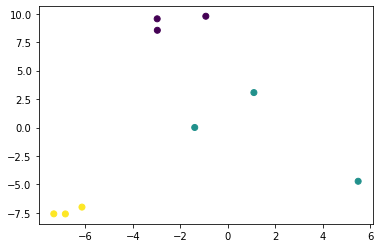

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=9, cluster_std=[1.0, 3.5, 0.5], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c =y);

#### Step 2: EM-step

Repeat until converged:

   1. *E-step*: for each sample, assign samples to nearest cluster using likelihood (called responsibilities) of gaussian distribution (instead of distance)
       - Evaluate responsibilities $r^{(i)}_{k}$ for every data point $x^{(i)}$ using 

$$ r^{(i)}_{k} = \frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}$$

   2. *M-step*: for each cluster, update the gaussian distribution of each cluster (instead of the mean only).
        - Restimate parameters $\pi_k, \mu_k, \Sigma_k$ using the current responsibilites $r^{(i)}_{k}$ from the E step.

$$ \mu_k = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}x^{(i)}$$

$$ \Sigma{_k} = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T$$

$$ \pi_k = \frac{N_k}{m}$$

where $N_k$ is the total responsibility of the $k$th mixture component along all samples

$$N_k = \sum\limits_{i=1}^{m}r^{(i)}_k$$


#### Step 3: Predict

### Proof

Assume $X = \{x^{(i)}, \cdots, x^{(m)}\}$ are drawn form an unkown distribution $p(x)$.  Our objective is to find a good approximation of this unknown distribution by means of a GMM with $K$ mixture components.  We exploit our i.i.d (independently and identically distributed) assumption, which leads to the log-likelihood as

$$\log p(X | \theta) = \sum\limits_{i=1}^m \log p(x^{(i)} | \theta) = \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

Our objective function is to find $\theta$ that maximize the log-likehood $\mathcal{L}$

$$
\max_\theta \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

Our "normal" procedure would be to comute the gradient $\frac{d\mathcal{L}}{d\theta}$ of the log-likelihood with respect to the model parameters $\theta$, set it to 0, and solve for $\theta$, however, if you try this yourself at home, you will find that it is not possible to find the closed form.

One way we can do turns out to be the EM algorithm, where the key idea is to update one model parameter at a time, while keeping the others fixed.

Before we find the partial derivatives, let us introduce a quantity that will play a central role in this algorithm: **responsibilities**.

We define the quantity

$$ r^{(i)}_{k} = \frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}$$

as the *responsibility* of the $k$th mixture component for the $i$th data point.  

$r^{(i)}_{k}$ basically gives us $$ \frac{\text{Probability of $x^{(i)}$ belonging to cluster k}}{\text{Probability of $x^{(i)}$ over all clusters}} $$

The responsibility $r^{(i)}_{k}$ of the $k$th mixture component for data point $x^{(i)}$ is proportional to the likelihood of the mixture component given the data point.

$$p(x^{(i)} | \pi_k, \mu_k, \Sigma_k) = \pi_k\mathcal{N}(x^{(i)}|\mu_k, \Sigma_k)$$

Therefore, mixture components have a high responsibility for a data point when the data point could be a **plausible sample** from that mixture component.  Note that 

$$r^{(i)} = r^{(i)}_1, r^{(i)}_2, \cdots, r^{(i)}_k \in \mathbb{R}^k$$

is a normalized probability vector, i.e., for each sample $i$

$$\sum\limits_{j=1}^{k}r^{(i)}_j = 1$$

$$ r^{(i)}_j \geq 0 $$

Thus this probability vector distributes probability mass among the $K$ mixture components, and we can think of $r^{(ik)}$ as probability that $x^{(i)}$ has been generated by the $k$th mixture component.

By summing all the total responsibility of the $k$th mixture component along all samples, we get $N_k$.

$$N_k = \sum\limits_{i=1}^{m}r^{(i)}_k$$

Note that this value does not necessarily equal to 1.

**Updating the mean**

The update of the mean parameters $\mu_k, k=1,\cdots,K$ of the GMM is given by:

$$ \mu_k^{new} = \frac{\sum\limits_{i=1}^{m}r^{(i)}_{k}x^{(i)}}{\sum\limits_{i=1}^{m}r^{(i)}_{k}}$$

To prove this:

Any local optimum of a function exhibits the property that its gradient with respect to the parameters must vanish, i.e., setting its partial derivative to zero.

We take a partial derivative of our objective function with respect to the mean parameters $\mu_k, k=1, \cdots, K$.  To simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(x^{(i)} | \theta)}{\partial \mu_k} = \sum\limits_{j=1}^K \pi_j \frac{\partial \mathcal{N}(x^{(i)} | \mu_j, \Sigma_j)}{\partial \mu_k} = \pi_k \frac{\partial \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)}{\partial \mu_k} = \pi_k(x^{(i)} - \mu_k)^T \Sigma_k^{-1}\mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)
$$

Now, taking all samples and log, since we know the partial derivative of $\log$ something is $\frac{1}{x}$, thus

$$
\frac{\partial \mathcal{L}}{\partial \mu_k} =\sum\limits_{i=1}^{m} \frac{\partial \log p(x^{(i)} | \theta)}{\partial \mu_k} = \sum\limits_{i=1}^{m} \frac{1}{p(x^{(i)} | \theta)} \frac{\partial p(x^{(i)} | \theta) }{\partial \mu_k} = \sum\limits_{i=1}^{m}(x^{(i)} - \mu_k)^T \Sigma_k^{-1}\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}
$$

To simplify, we can substitute $r^{(i)}_{k}$ into the equation, thus

$$= \sum\limits_{i=1}^{m} r^{(i)}_{k}(x^{(i)} - \mu_k)^T\Sigma_k^{-1}$$

We can now solve for $\mu_k$ so that $\frac{\partial \mathcal{L}}{\partial \mu_k} = 0$ and obtain

$$\sum\limits_{i=1}^{m} r^{(i)}_{k}(x^{(i)} - \mu_k)^T\Sigma_k^{-1} = 0$$

Multiply both sides by $\Sigma$ will cancel out the inverse $\Sigma$, and move $\mu_k$ to another side

$$\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)}  = \sum\limits_{i=1}^{m} r^{(i)}_{k}\mu_k$$

$$\frac{\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)} }{\sum\limits_{i=1}^{m} r^{(i)}_{k}}  = \mu_k$$

We can further substitute $N_k$ so that

$$
\frac{1}{N_k}\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)} = \mu_k
$$

Here we can interpret that $\mu_k$ is pulled toward a data point $x^{(i)}$ with strength given by $r^{(i)}_{k}$.  The means are pulled stronger toward data points for which the corresponding mixture component has a high responsibility, i.e., a high likelihood.

**Updating the covariances**

The update of the covariance parameters $\Sigma_k, k=1,\cdots,K$ of the GMM is given by:

$$ \Sigma_k^{new} = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T $$

To prove this:

We take a partial derivative of our objective function with respect to the Sigma parameters $\Sigma_k, k=1, \cdots, K$.  Similarly, to simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k} = \frac{\partial}{\partial \Sigma_k} \big(\pi_k(2\pi)^{-\frac{D}{2}} \det(\Sigma_k)^{\frac{1}{2}}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)\big)\big)
$$

Using derivative multiplication rule, we got

$$
= \pi_k(2\pi)^{-\frac{D}{2}}\big[\frac{\partial}{\partial \Sigma_k}\det(\Sigma_k)^{-\frac{1}{2}}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)) + \det(\Sigma_k)^{-\frac{1}{2}}\frac{\partial}{\partial \Sigma_k}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)\big]
$$

Using this following rule

$$
\frac{\partial}{\partial X}\det(f(x)) = \det(f(x))tr\big(f(x)^{-1}\frac{\partial f(x)}{\partial x}\big)
$$

We get that

$$
\frac{\partial}{\partial \Sigma_k}\det(\Sigma_k)^{-\frac{1}{2}} = -\frac{1}{2}\det(\Sigma_k)^{-\frac{1}{2}}\Sigma_k^{-1}
$$

Using this following rule

$$
\frac{\partial a^TXb}{\partial X} = ab^T
$$

We get that

$$
\frac{\partial}{\partial \Sigma_k}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k) = -\Sigma_k^{-1}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1}
$$

Putting them together, we got:

$$
\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k} = \pi_k\mathcal{N}(x^{(i)} | \mu_k, \Sigma_k) * \big[-\frac{1}{2}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1}\big]
$$

Now consider all samples and log as well, the partial derivative of the log-likelihood with respect to $\Sigma_k$ is given by

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \Sigma_k} &=  \sum\limits_{i=1}^{m}\frac{\partial \log p(x^{(i)} | \theta)}{\partial \Sigma_k}\\
&=\sum\limits_{i=1}^{m}\frac{1}{(p(x^{(i)} | \theta)}\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k}\\
&=\sum\limits_{i=1}^{m}\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} * \big[-\frac{1}{2}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1})\big]
\end{aligned}
$$

Substituting $r^{(i)}_{k}$, we got

$$
= -\frac{1}{2}\sum\limits_{i=1}^{m}r^{(i)}_{k}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1})\\
= -\frac{1}{2}\Sigma_k^{-1}\sum\limits_{i=1}^{m}r^{(i)}_{k} + \frac{1}{2}\Sigma_k^{-1}\big(\sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\big)\Sigma_k^{-1}
$$

Setting this to zero, we obtain:

$$
N_k\Sigma_k^{-1} = \Sigma_k^{-1}\big(\sum\limits_{i=1}^m r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\big)\Sigma_k^{-1}
$$

By solving for $\Sigma_k$ we got

$$
\Sigma_k = \frac{1}{N_k}\sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T
$$

**Updating the pi - weight of mixture components**

The update of the mixture weights $\pi_k, k=1,\cdots,K$ of the GMM is given by:

$$ \pi_k^{new} = \frac{N_k}{m}$$

To prove this:

To find the partial derivative, we account for the equality constraint 

$$\sum\limits_{k=1}^K \pi_k=1$$

The Lagrangian $\mathscr{L}$ is

$$
\begin{aligned}
\mathscr{L} &= \mathcal{L} + \beta\big(\sum\limits_{k=1}^K \pi_k-1\big)\\
&= \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k) + \beta\big(\sum\limits_{k=1}^K \pi_k-1\big)
\end{aligned}
$$

Taking the partial derivative with respect to $\pi_k$ as

$$
\begin{aligned}
\frac{\partial \mathscr{L}}{\partial \pi_k} &= \sum\limits_{i=1}^m
\frac{\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} + \beta \\
&= \frac{1}{\pi_k}\sum\limits_{i=1}^m\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} + \beta\\
&= \frac{N_k}{\pi_k} + \beta
\end{aligned}
$$

Taking the partial derivative with respect to $\beta$ is

$$
\frac{\partial \mathscr{L}}{\partial \beta} = \sum\limits_{i=1}^{K} \pi_k - 1
$$

Setting both partial derivatives to zero yield

$$
\pi_k = -\frac{N_k}{\beta}
$$

$$
1 = \sum\limits_{i=1}^K\pi_k
$$

Using the top formula to solve for the bottom formula:

$$    
- \sum\limits_{i=1}^{m}\frac{N_k}{\beta} = 1\\
= -\frac{m}{\beta} = 1\\
= \beta = -m
$$

Substitute $-m$ for $\beta$ yield

$$
\pi_k = \frac{N_k}{m}
$$

### Scratch

### Sklearn

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for *density estimation*.  That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall *distribution* of the input data.
This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.
For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

The above data is a "generated" data - not real data.  So by understanding the distribution, it is useful to generate the data

#### How many components for understanding distribution?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset.
A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the *likelihood* of the data under the model, using cross-validation to avoid over-fitting.

Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

$$ AIC = 2k - 2ln(L) $$

$$ BIC = kln(n) - 2ln(L) $$

where k is the number of features and L is maximum likelihood.  Basically,  number of features will increase AIC, while L will decrease AIC.  We want to good balance between model complexity and goodness of fit, thus lower the AIC, the better.

Scikit-Learn's ``GMM`` estimator actually includes built-in methods that compute AIc, and so it is very easy to operate on this approach.

Let's look at the AIC as a function as the number of GMM components for our moon dataset:

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice.
As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works *as a density estimator*, not how well it works *as a clustering algorithm*.
I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

#### Example: GMM for Generating New Data

Here, since GMM is kind of model that tries to understand the data probability distribution.  GMM can be used to generate *new handwritten digits* from the standard digits corpus that we have used before.

To start with, let's load the digits data using Scikit-Learn's data tools:

We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more.
GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data.
Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss.
Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

It appears that around 110 components minimizes the AIC; we will use this model.
Let's quickly fit this to the data and confirm that it has converged:

Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

*Finally*, we can use the inverse transform of the PCA object to construct the new digits:

Consider what we've done here: given a sampling of handwritten digits, we have modeled the distribution of that data in such a way that we can generate brand new samples of digits from the data: these are "handwritten digits" which do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.
Such a generative model of digits is perhaps the basic idea behind **"Generative Adversarial Network"**

### When to use GMM

Pros:
    - Address the limitations of K-means
    - Can be used to generate data, since we know $P(x | y)$

Cons:
    - Just like K-mean, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it performs early stopping when the log likelihood does not improve anymore.
- Perform plotting every 5 iterations on the resulting clusters.